In [2]:
import pandas as pd

## Analyzing the simulated human annotated scores

In [8]:
df = pd.read_pickle('dataset/data_with_human_feedback.pickle')
df.dropna(inplace=True)
df.head()

,source,instruction,model,answer,score,grader,human_feedback,human_feedback_score,human_feedback_analysis,persona_name,persona_bio
0,flan_v2_niv2,The task is about translation from Telugu to E...,wizardlm-70b,[A]: Oh no!,6.0,wizardlm-70b,"{'analysis': 'The answer conveys a sudden, neg...",7,"The answer conveys a sudden, negative reaction...",Luna Martinez - Novelist,"Luna Martinez, a novelist and poet who appreci..."
1,sharegpt,can you explain this alert configuration?\n\nC...,llama-2-70b-chat,"Sure, I'd be happy to explain this alert confi...",7.0,llama-2-70b-chat,{'analysis': 'The explanation is thorough but ...,6,"The explanation is thorough but dry, lacking a...",Luna Martinez - Novelist,"Luna Martinez, a novelist and poet who appreci..."
2,flan_v2_niv2,Q: You are given a sentence in Arabic. Your jo...,vicuna-33b,"Per questo, non esiste una strategia che si co...",9.0,vicuna-33b,{'analysis': 'The translation is clear and con...,7,"The translation is clear and concise, conveyin...",Luna Martinez - Novelist,"Luna Martinez, a novelist and poet who appreci..."
3,evol_instruct,Can you suggest some specific actions or strat...,llama-2-70b-chat,Thank you for asking! I'm happy to help you wi...,8.5,llama-2-70b-chat,{'analysis': 'The answer provides a comprehens...,6,The answer provides a comprehensive list of st...,Sarah Chen - University Professor,"Dr. Sarah Chen, a rigorous university professo..."
4,sharegpt,I want you to act as a Content writer very pro...,wizardlm-7b,Hammocks and swings can be a great choice for ...,6.0,wizardlm-7b,{'analysis': 'The article provides a clear int...,6,The article provides a clear introduction to h...,Jamie Park - College Student,"Jamie Park, an enthusiastic college junior who..."


Pearson correlation coefficient: 0.737
P-value: 0.000


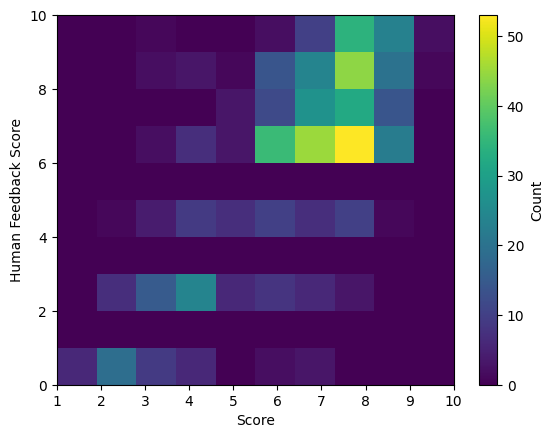

In [9]:
# plot histogram of scores and calculate correlation
import matplotlib.pyplot as plt
import scipy.stats as stats

# Convert scores to numeric type
df['score'] = pd.to_numeric(df['score'])
df['human_feedback_score'] = pd.to_numeric(df['human_feedback_score'])

# Calculate correlation
correlation, p_value = stats.pearsonr(df['score'], df['human_feedback_score'])
print(f"Pearson correlation coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

# Plot
plt.hist2d(df['score'], df['human_feedback_score'], bins=10, cmap='viridis')
plt.colorbar(label='Count')
plt.xlabel('Score') 
plt.ylabel('Human Feedback Score')
plt.show()